# Data preparation II

## Normalize, Standardize, Discretize

The [DataSet](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv) corresponds to minimum daily temperatures of Melbourne from 1981 to 1990 
[Tutorial](https://machinelearningmastery.com/normalize-standardize-time-series-data-python/)


In [1]:
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('daily-temperatures.csv', header=0, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


In [3]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [5]:
df.shape

(3650, 1)

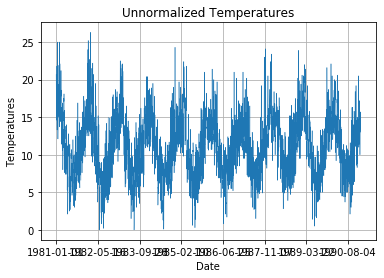

In [6]:
plt.title('Unnormalized Temperatures')
sns.set(rc={'figure.figsize':(11, 4)})
plt.ylabel('Temperatures')
df['Temp'].plot(linewidth=0.5)

## Normalization Method

In [7]:
# prepare data for normalization
values = df.values
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
print("Normalized\n",normalized[0:5])

# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
print("Inversed\n",inversed[0:5])

type(normalized)

Min: 0.000000, Max: 26.300000
Normalized
 [[0.78707224]
 [0.68060837]
 [0.7148289 ]
 [0.55513308]
 [0.60076046]]
Inversed
 [[20.7]
 [17.9]
 [18.8]
 [14.6]
 [15.8]]


numpy.ndarray

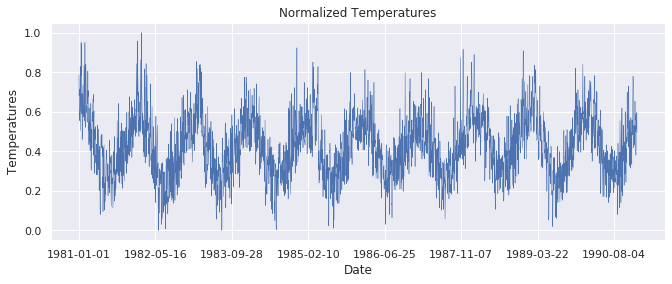

In [8]:
nDS = df.copy()
nDS['Temp']=normalized
plt.title('Normalized Temperatures')
plt.ylabel('Temperatures')
sns.set(rc={'figure.figsize':(11, 4)})
nDS['Temp'].plot(linewidth=0.5)

## Standardize method

In [9]:
print(df.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [10]:
# prepare data for standardization
values = df.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
print("Normalized\n",normalized[0:5])

# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
print("Inversed\n",inversed[0:5])

Mean: 11.177753, StandardDeviation: 4.071279
Normalized
 [[2.33888328]
 [1.65113873]
 [1.87219948]
 [0.84058266]
 [1.13533032]]
Inversed
 [[20.7]
 [17.9]
 [18.8]
 [14.6]
 [15.8]]


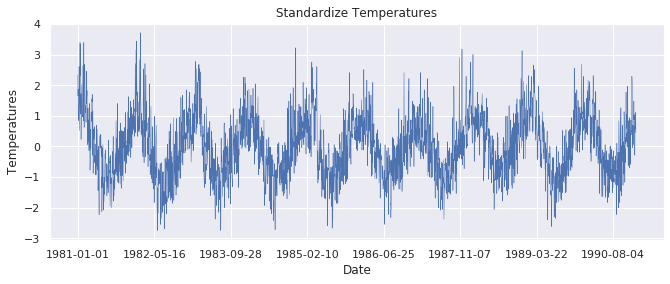

In [11]:
nDS = df.copy()
nDS['Temp']=normalized
plt.title('Standardize Temperatures')
plt.ylabel('Temperatures')
sns.set(rc={'figure.figsize':(11, 4)})
nDS['Temp'].plot(linewidth=0.5)

## Discretize

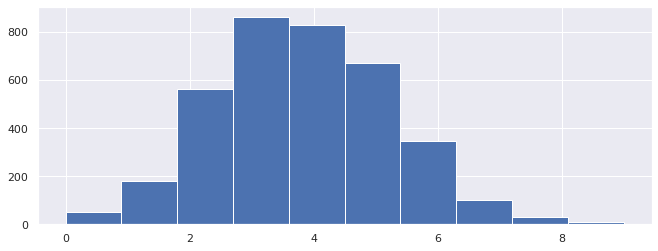

In [12]:
# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(values)

# histogram of the transformed data
plt.hist(data_trans, bins=10)
plt.show()